In [2]:
# MNIST
# DataLoader,Transformation
# Multilayer Neural Net, Activation Function
# Loss and Optimiser
# Training Loop(Batch Training)
# Model Evaluation
# GPU Support

In [3]:
import torch
import torch.nn as nn
import torchvision 
import torchvision.transforms as trans
import matplotlib.pyplot as plt



### Device Config

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
# hyper parameters

input_size = 784 # 28 * 28
hidden_size = 100
num_classes = 10
num_epochs  = 2
batch_size = 100
learning_rate = 0.001

In [6]:
# MNIST

train_dataset = torchvision.datasets.MNIST(root='./data',train=True,transform=trans.transforms.ToTensor(),
            download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',train=False,
                                          transform=trans.transforms.ToTensor(),
            )

In [7]:
train_loader = torch.utils.data.DataLoader(
    dataset = train_dataset,
    batch_size = batch_size,
    shuffle = True
)

test_loader = torch.utils.data.DataLoader(
    dataset = test_dataset,
    batch_size = batch_size,
    shuffle = False
)

In [8]:
examples = iter(train_loader)
samples,labels =examples.next()
print(samples.shape,labels.shape)  # 1 in samples is for color channel
# due to black & white it's value is 1
#100 samples
# 28 * 28 each sample

torch.Size([100, 1, 28, 28]) torch.Size([100])


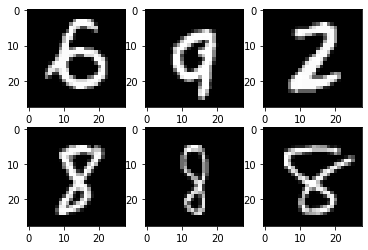

In [9]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0],cmap = 'gray')
plt.show()

In [16]:
class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(NeuralNet,self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size,num_classes)
        
    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        

In [20]:
model = NeuralNet(input_size,hidden_size,num_classes).to(device)

In [21]:
# loss and optimiser

criterion = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(model.parameters(),lr = learning_rate)

In [25]:
# training loop

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i,(images,label) in enumerate(train_loader):
        # reshaping from 100,1,28,28 to 100,28*28
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        
        #forward 
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        #backwards
        optimiser.zero_grad
        loss.backward()
        optimiser.step()   #update parameters for us
        
        if (i+1)%100 == 0:
            print(f'epoch {epoch+1}/{num_epochs} , step : {i+1}/{n_total_steps} ,\
                  loss = {loss.item():.4f}')

TypeError: cross_entropy_loss(): argument 'input' (position 1) must be Tensor, not NoneType

In [ ]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)

